# Import The Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
dataset = pd.read_csv('Walmart_Sales.csv')
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [2]:
df = dataset.copy()
df.index = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.drop(['Date'], axis=1)

In [3]:
from func import check_data
check_data(df)

            Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106  

Data shape: (6435, 7)

Data info:
 <bound method DataFrame.info of             Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                              

# Visualize

<Axes: title={'center': 'Weekly Sales'}, xlabel='Date'>

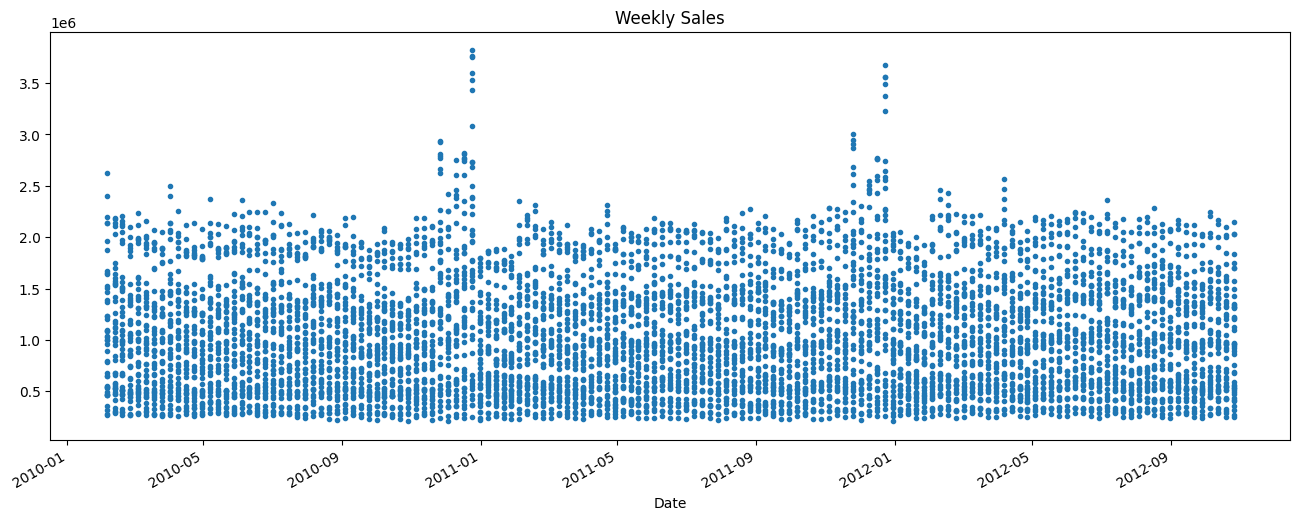

In [4]:
df['Weekly_Sales'].plot(style='.', 
                        figsize=(16, 6), 
                        color=color_pal[0],
                        title='Weekly Sales')

In [5]:
from func import CreateTimeSeries
df = CreateTimeSeries(df)
train = df.loc[df.index < '01-07-2012']
test = df.loc[df.index >= '01-07-2012']

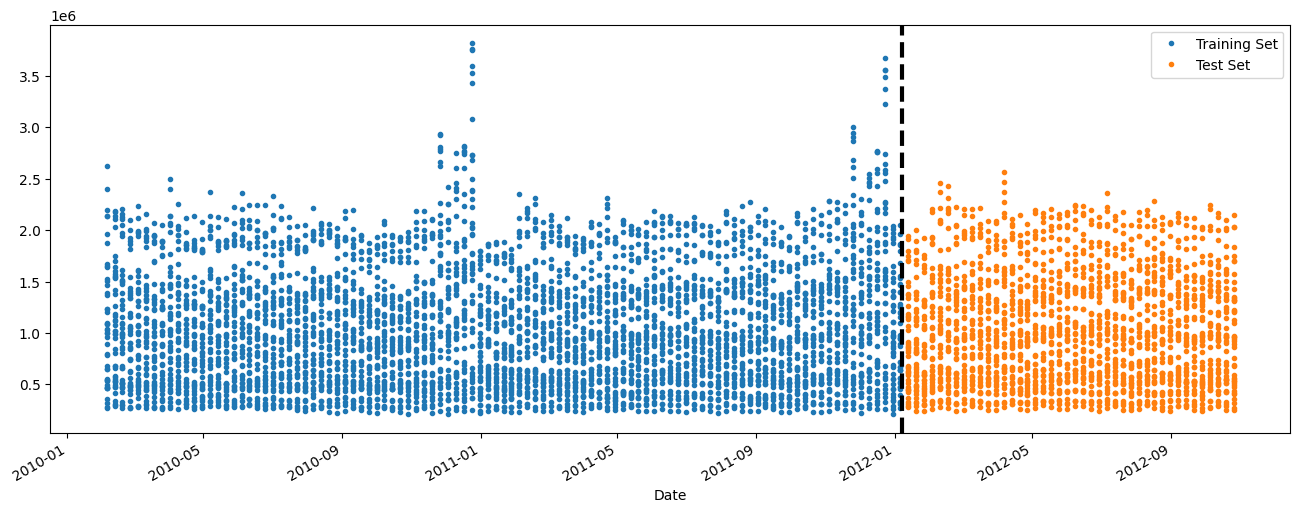

In [6]:
fig, ax = plt.subplots(figsize=(16, 6))
train['Weekly_Sales'].plot(ax=ax, label='Training Set', style='.')
test['Weekly_Sales'].plot(ax=ax, label='Test Set', style='.')
ax.axvline('01-07-2012', color='black', ls='--', lw=3)
ax.legend(['Training Set', 'Test Set'])
plt.show()

<Axes: title={'center': 'Sales In A Week'}, xlabel='Date'>

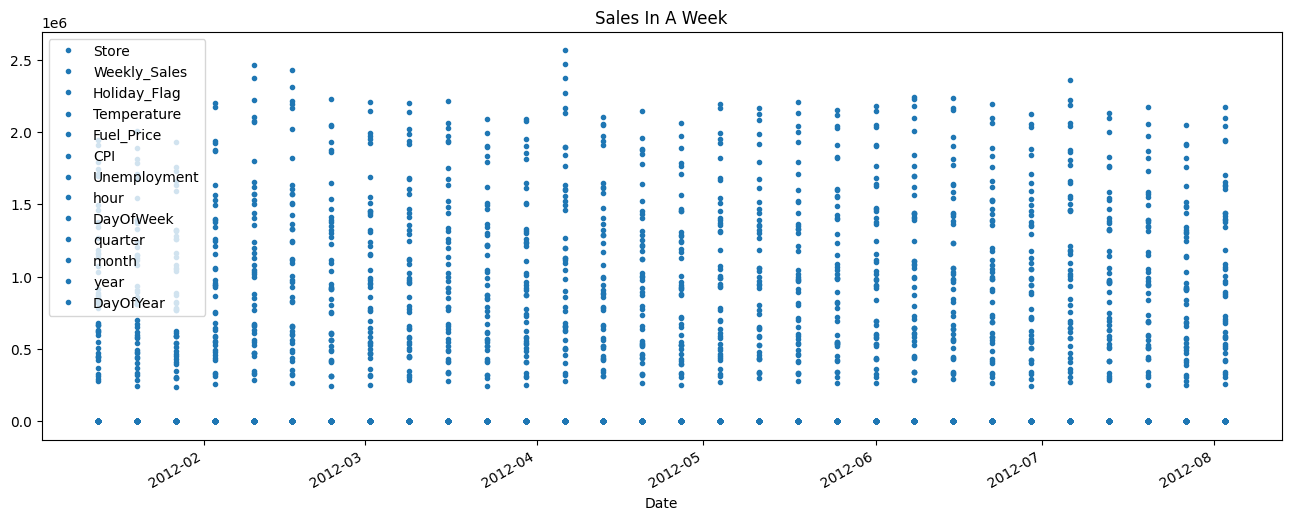

In [7]:
df.loc[(df.index > '01-09-2012') & (df.index < '08-09-2012')].plot(style = '.', 
                                                                   figsize=(16, 6), 
                                                                   color=color_pal[0],
                                                                   title='Sales In A Week')

## Outliears

<Axes: ylabel='Frequency'>

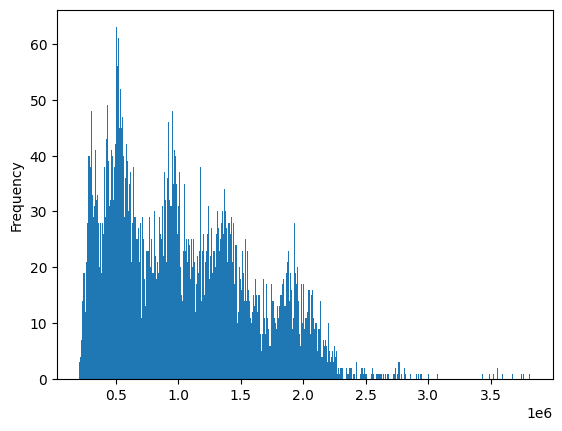

In [8]:
df['Weekly_Sales'].plot(kind='hist', bins=500)

<Axes: xlabel='Date'>

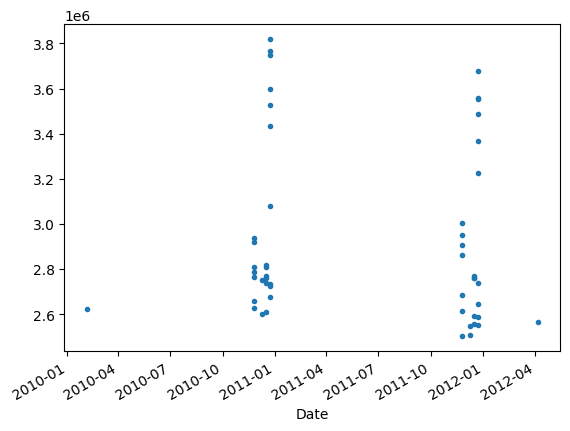

In [9]:
df.query('Weekly_Sales > 2.5e6')['Weekly_Sales'].plot(style='.')

<Axes: xlabel='Date'>

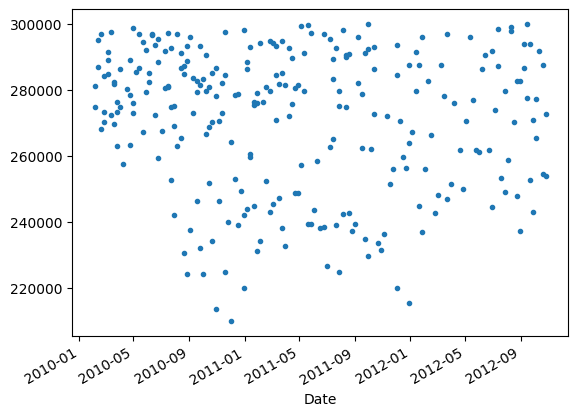

In [10]:
df[df['Weekly_Sales'] < 0.3e6]['Weekly_Sales'].plot(style='.')

In [11]:
df = df.query('Weekly_Sales < 2.5e6')
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,hour,DayOfWeek,quarter,month,year,DayOfYear
Date,,,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,0,4,1,2,2010,36
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,0,4,1,2,2010,43
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,0,4,1,2,2010,50
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,0,4,1,2,2010,57
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,4,1,3,2010,64


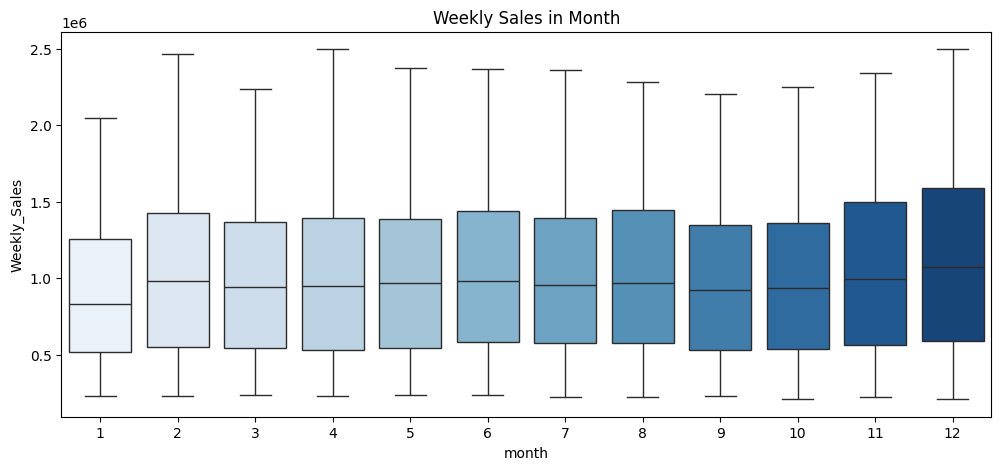

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(data=df,
            x='month',
            y='Weekly_Sales',
            palette='Blues')
ax.set_title('Weekly Sales in Month')
plt.show()

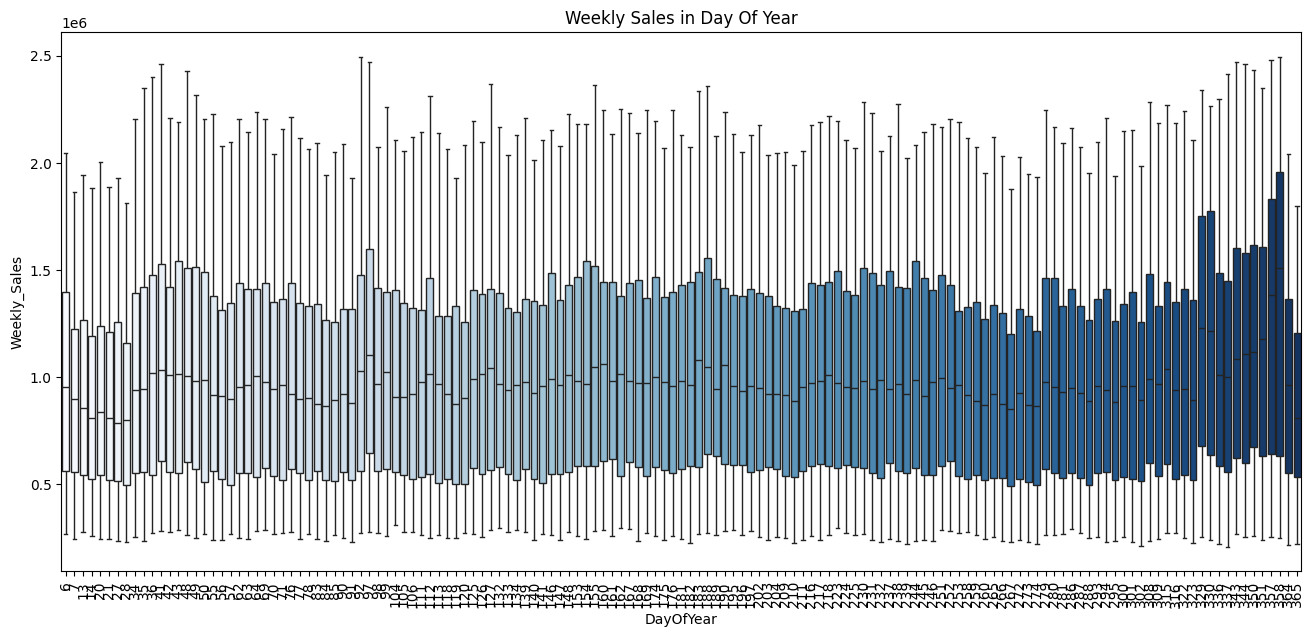

In [13]:
fig, ax = plt.subplots(figsize=(16, 7))
sns.boxplot(data=df,
            x='DayOfYear',
            y='Weekly_Sales',
            palette='Blues')
ax.set_title('Weekly Sales in Day Of Year')
ax.tick_params(axis='x', rotation=90)
plt.show()

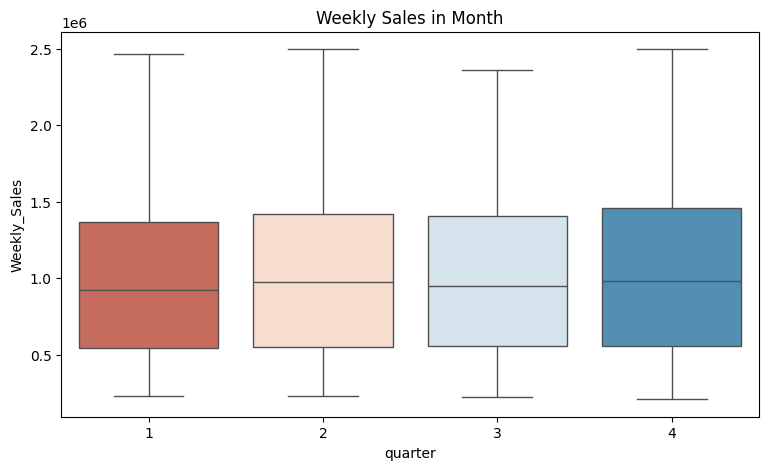

In [14]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.boxplot(data=df,
            x='quarter',
            y='Weekly_Sales',
            palette='RdBu')
ax.set_title('Weekly Sales in Month')
plt.show()

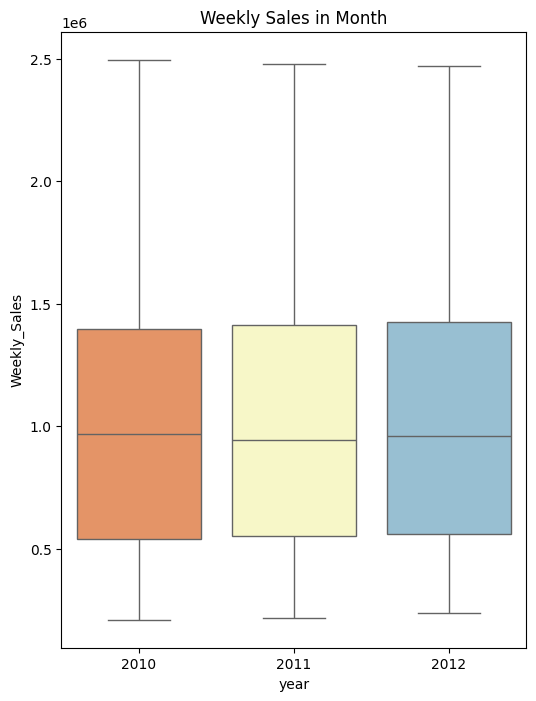

In [15]:
fig, ax = plt.subplots(figsize=(6, 8))
sns.boxplot(data=df,
            x='year',
            y='Weekly_Sales',
            palette='RdYlBu')
ax.set_title('Weekly Sales in Month')
plt.show()

# Machine Learning Forecasting

## Library

In [16]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, train_test_split

## Forecasting Horizon

### Time Series

In [35]:
tss = TimeSeriesSplit(n_splits=5, 
                      test_size=6*90, 
                      gap=12)
df = df.sort_index()
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,hour,DayOfWeek,quarter,month,year,DayOfYear
Date,,,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,0,4,1,2,2010,36
2010-02-05,24,1388725.63,0,22.43,2.954,131.527903,8.326,0,4,1,2,2010,36
2010-02-05,19,1507637.17,0,20.96,2.954,131.527903,8.350,0,4,1,2,2010,36
2010-02-05,8,1004137.09,0,34.14,2.572,214.471451,6.299,0,4,1,2,2010,36
2010-02-05,42,543384.01,0,54.34,2.962,126.442065,9.765,0,4,1,2,2010,36


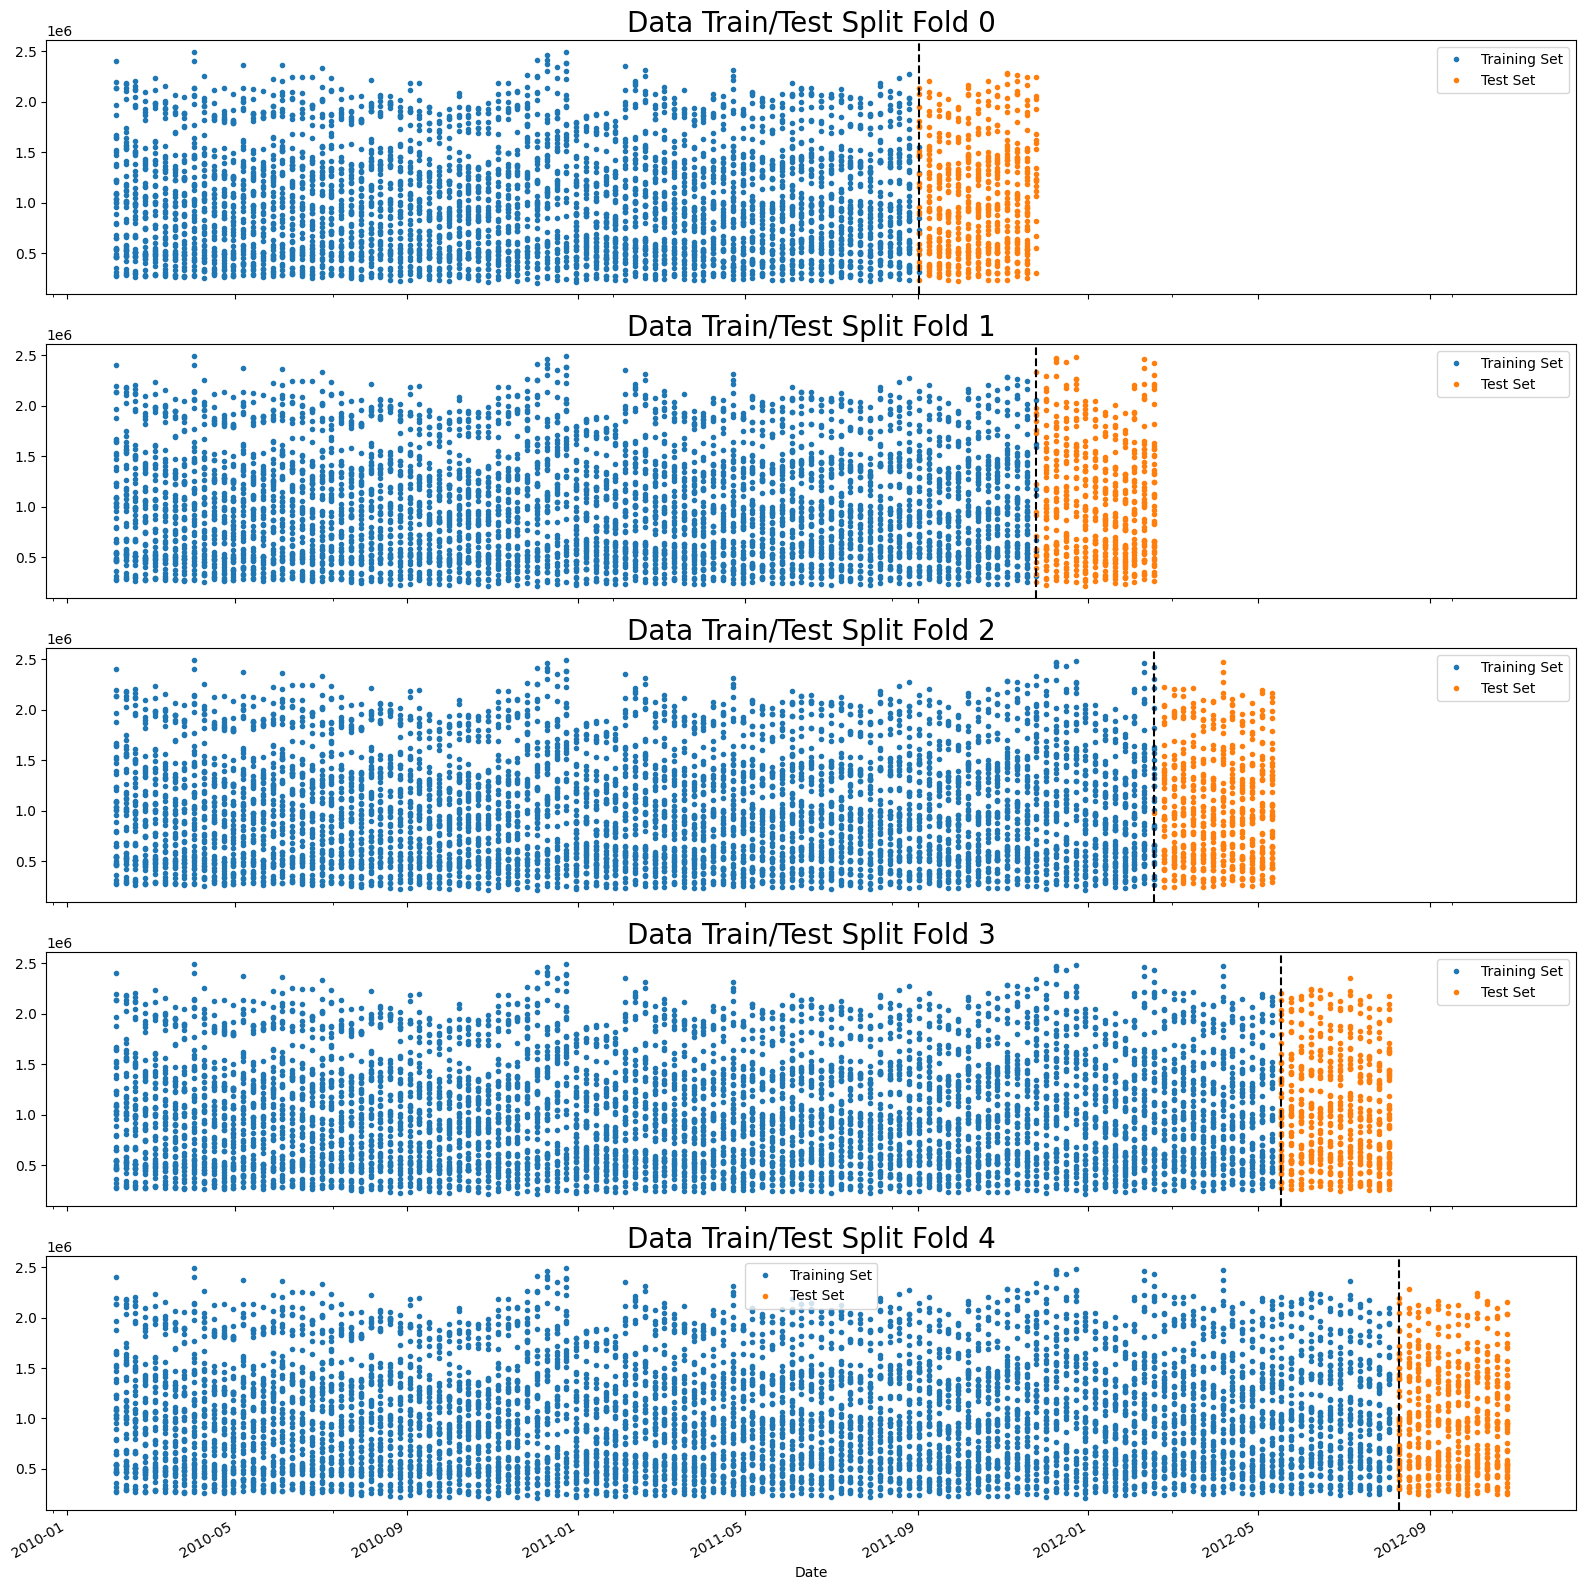

In [34]:
fig, axs = plt.subplots(5, 1, 
                        figsize=(16, 16),
                        sharex=True)
fold = 0
for train_idx, test_idx in tss.split(df):
    trainTSS = df.iloc[train_idx]
    testTSS = df.iloc[test_idx]
    trainTSS['Weekly_Sales'].plot(ax=axs[fold],
                                  style='.',
                                  label='Training Set')
    testTSS['Weekly_Sales'].plot(ax=axs[fold],
                                 style='.',
                                 label='Test Set')
    axs[fold].axvline(testTSS.index.min(),  color='black', ls='--')
    axs[fold].set_title(f'Data Train/Test Split Fold {fold}', fontsize=20)
    axs[fold].legend()
    fold += 1

plt.tight_layout()
plt.show()

### Lag Features

In [57]:
target = df['Weekly_Sales'].to_dict()
target

{Timestamp('2010-02-05 00:00:00'): 1967220.53,
 Timestamp('2010-02-12 00:00:00'): 2030933.46,
 Timestamp('2010-02-19 00:00:00'): 463513.26,
 Timestamp('2010-02-26 00:00:00'): 2006774.96,
 Timestamp('2010-03-05 00:00:00'): 2237544.75,
 Timestamp('2010-03-12 00:00:00'): 445393.74,
 Timestamp('2010-03-19 00:00:00'): 333025.47,
 Timestamp('2010-03-26 00:00:00'): 1076021.58,
 Timestamp('2010-04-02 00:00:00'): 1029849.2,
 Timestamp('2010-04-09 00:00:00'): 1545418.53,
 Timestamp('2010-04-16 00:00:00'): 715311.6,
 Timestamp('2010-04-23 00:00:00'): 1067340.74,
 Timestamp('2010-04-30 00:00:00'): 1186971.02,
 Timestamp('2010-05-07 00:00:00'): 399323.86,
 Timestamp('2010-05-14 00:00:00'): 966054.97,
 Timestamp('2010-05-21 00:00:00'): 747888.25,
 Timestamp('2010-05-28 00:00:00'): 279246.33,
 Timestamp('2010-06-04 00:00:00'): 1095539.13,
 Timestamp('2010-06-11 00:00:00'): 619337.29,
 Timestamp('2010-06-18 00:00:00'): 364076.85,
 Timestamp('2010-06-25 00:00:00'): 737569.14,
 Timestamp('2010-07-02 00:

In [54]:
df_lag = df.copy()

In [77]:
def add_lags(df):
    df_lag = df.copy()
    df_lag['Lag1'] = (df_lag.index - pd.Timedelta('182 days')).map(target)
    df_lag['Lag2'] = (df_lag.index - pd.Timedelta('364 days')).map(target)
    df_lag['Lag3'] = (df_lag.index - pd.Timedelta('546 days')).map(target)
    return df_lag

In [78]:
df_lag = add_lags(df_lag)

In [80]:
df_lag.tail()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,hour,DayOfWeek,quarter,month,year,DayOfYear,Lag1,Lag2,Lag3
Date,,,,,,,,,,,,,,,,
2012-10-26,16,475770.14,0,40.99,3.686,199.219532,5.847,0,4,4,10,2012,300,308389.82,1419445.12,611464.21
2012-10-26,17,943465.29,0,39.94,3.755,131.193097,5.527,0,4,4,10,2012,300,308389.82,1419445.12,611464.21
2012-10-26,35,865137.60,0,58.99,3.882,142.762411,8.665,0,4,4,10,2012,300,308389.82,1419445.12,611464.21
2012-10-26,19,1322117.96,0,56.49,4.071,138.728161,7.992,0,4,4,10,2012,300,308389.82,1419445.12,611464.21
2012-10-26,45,760281.43,0,58.85,3.882,192.308899,8.667,0,4,4,10,2012,300,308389.82,1419445.12,611464.21


In [96]:
fold = 0
preds = []
scores = []
for train_idx, test_idx in tss.split(df):
    trainTSS = df_lag.iloc[train_idx]
    testTSS = df_lag.iloc[test_idx]

    X_train = trainTSS.iloc[:, 2:]
    y_train = trainTSS.iloc[:, 1]
    
    X_test = testTSS.iloc[:, 2:]
    y_test = testTSS.iloc[:, 1]

    # XGBosst
    reg = xgb.XGBRegressor(base_score=0.5,
                         booster='gbtree',
                         n_estimators=1000,
                         early_stopping_rounds=50,
                         objective='reg:linear',
                         max_depth=3,
                         learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)
    fold += 1


[0]	validation_0-rmse:1148347.30622	validation_1-rmse:1154226.47091
[100]	validation_0-rmse:616238.74247	validation_1-rmse:641833.10750
[200]	validation_0-rmse:495642.47841	validation_1-rmse:536061.33592
[300]	validation_0-rmse:471065.66847	validation_1-rmse:521073.46831
[394]	validation_0-rmse:462809.93855	validation_1-rmse:520955.25586
[0]	validation_0-rmse:1147258.87434	validation_1-rmse:1194053.80090
[100]	validation_0-rmse:618210.28786	validation_1-rmse:708529.54199
[200]	validation_0-rmse:499771.71371	validation_1-rmse:591418.02137
[300]	validation_0-rmse:475627.97522	validation_1-rmse:569791.42479
[400]	validation_0-rmse:466281.11879	validation_1-rmse:567532.29665
[445]	validation_0-rmse:462827.76514	validation_1-rmse:567671.85565
[0]	validation_0-rmse:1153336.97030	validation_1-rmse:1157653.81952
[100]	validation_0-rmse:629848.56061	validation_1-rmse:657215.12265
[200]	validation_0-rmse:513203.68115	validation_1-rmse:551415.83537
[300]	validation_0-rmse:489327.11856	validation_

In [99]:
# Log
fold = 0
preds_log = []
scores_log = []
for train_idx, test_idx in tss.split(df):
    trainTSS = df_lag.iloc[train_idx]
    testTSS = df_lag.iloc[test_idx]

    X_train = trainTSS.iloc[:, 2:]
    y_train = trainTSS.iloc[:, 1]
    y_train = np.log(y_train)
    
    X_test = testTSS.iloc[:, 2:]
    y_test = testTSS.iloc[:, 1]

    # XGBosst
    reg = xgb.XGBRegressor(base_score=0.5,
                         booster='gbtree',
                         n_estimators=1000,
                         early_stopping_rounds=50,
                         objective='reg:linear',
                         max_depth=3,
                         learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = np.exp(reg.predict(X_test))
    preds_log.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores_log.append(score)
    fold += 1


[0]	validation_0-rmse:13.06646	validation_1-rmse:1163519.48907
[100]	validation_0-rmse:4.81396	validation_1-rmse:1163512.15117
[200]	validation_0-rmse:1.83039	validation_1-rmse:1163509.44308
[300]	validation_0-rmse:0.82050	validation_1-rmse:1163508.44337
[400]	validation_0-rmse:0.55208	validation_1-rmse:1163508.07831
[500]	validation_0-rmse:0.49826	validation_1-rmse:1163507.94519
[600]	validation_0-rmse:0.48422	validation_1-rmse:1163507.88747
[700]	validation_0-rmse:0.47669	validation_1-rmse:1163507.87283
[800]	validation_0-rmse:0.47016	validation_1-rmse:1163507.86286
[900]	validation_0-rmse:0.46482	validation_1-rmse:1163507.85936
[913]	validation_0-rmse:0.46419	validation_1-rmse:1163507.86020
[0]	validation_0-rmse:13.06545	validation_1-rmse:1203016.02423
[100]	validation_0-rmse:4.81335	validation_1-rmse:1203008.73590
[200]	validation_0-rmse:1.83254	validation_1-rmse:1203006.04644
[300]	validation_0-rmse:0.82838	validation_1-rmse:1203005.06913
[400]	validation_0-rmse:0.56586	validation

In [104]:
# Untuk Score normal value
print(f'Score normal value:\n{"\n".join([f"{score:.2f}" for score in scores])}')

# Untuk Score log value
print(f'Score log value:\n{"\n".join([f"{score_log:.2f}" for score_log in scores_log])}')


Score normal value:
520510.03
567515.62
522174.11
517891.68
504137.83
Score log value:
534501.59
572661.13
534510.63
546938.44
507803.78


## XGBosst

### Split the data

In [83]:
# Training data
## Data without Lags
X = train.iloc[:, 2:]
y = train.iloc[:, 1]
y = np.log(y)


# Test Data
X_test = test.iloc[:, 2:]
y_test = test.iloc[:, 1]

In [84]:
X

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,hour,DayOfWeek,quarter,month,year,DayOfYear
Date,,,,,,,,,,,
2010-02-05,0,42.31,2.572,211.096358,8.106,0,4,1,2,2010,36
2010-02-12,1,38.51,2.548,211.242170,8.106,0,4,1,2,2010,43
2010-02-19,0,39.93,2.514,211.289143,8.106,0,4,1,2,2010,50
2010-02-26,0,46.63,2.561,211.319643,8.106,0,4,1,2,2010,57
2010-03-05,0,46.50,2.625,211.350143,8.106,0,4,1,3,2010,64
...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09,0,46.57,3.415,188.654469,8.523,0,4,4,12,2011,343
2011-12-16,0,39.93,3.413,188.797935,8.523,0,4,4,12,2011,350
2011-12-23,0,42.27,3.389,188.929975,8.523,0,4,4,12,2011,357


In [15]:
X_test

,Temperature,Fuel_Price,CPI,Unemployment,quarter,month,year,DayOfYear
Date,,,,,,,,
2012-01-13,48.53,3.261,219.892526,7.348,1,1,2012,13
2012-01-20,54.11,3.268,219.985689,7.348,1,1,2012,20
2012-01-27,54.26,3.290,220.078852,7.348,1,1,2012,27
2012-02-03,56.55,3.360,220.172015,7.348,1,2,2012,34
2012-02-10,48.02,3.409,220.265178,7.348,1,2,2012,41
...,...,...,...,...,...,...,...,...
2012-09-28,64.88,3.997,192.013558,8.684,3,9,2012,272
2012-10-05,64.89,3.985,192.170412,8.667,4,10,2012,279
2012-10-12,54.47,4.000,192.327265,8.667,4,10,2012,286


In [16]:
y

Date
2010-02-05    14.312455
2010-02-12    14.311400
2010-02-19    14.292966
2010-02-26    14.158907
2010-03-05    14.256862
                ...    
2011-12-09    13.771721
2011-12-16    13.891458
2011-12-23    14.235508
2011-12-30    13.675563
2012-01-06    13.478752
Name: Weekly_Sales, Length: 4545, dtype: float64

### Train the data with XGBoost

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=42)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((3636, 8), (3636,), (909, 8), (909,), (1890, 8), (1890,))

In [18]:
reg = xgb.XGBRegressor(n_estimator=1000,
                       early_stopping_rounds=50,
                       learning_rate=0.1)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=20)

[0]	validation_0-rmse:0.57846	validation_1-rmse:0.57530
[20]	validation_0-rmse:0.46320	validation_1-rmse:0.47986
[40]	validation_0-rmse:0.42525	validation_1-rmse:0.46277
[60]	validation_0-rmse:0.39893	validation_1-rmse:0.45423
[80]	validation_0-rmse:0.38127	validation_1-rmse:0.45472
[99]	validation_0-rmse:0.36881	validation_1-rmse:0.45900


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=1000, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### Visualize the results

In [19]:
fi = pd.DataFrame(data = reg.feature_importances_,
                  index = reg.feature_names_in_,
                  columns=['Importance'])

<Axes: title={'center': 'Feature Importances'}>

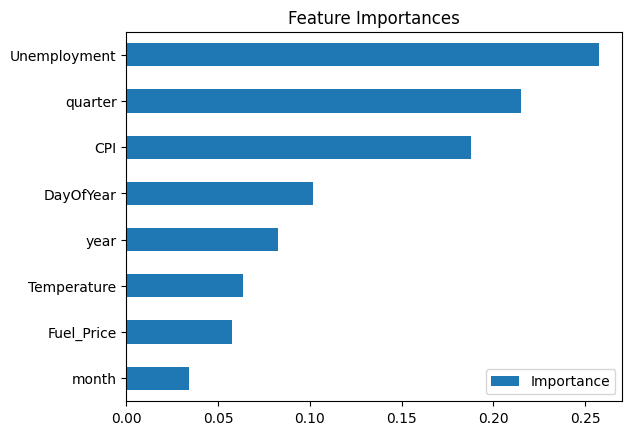

In [20]:
fi.sort_values(by='Importance').plot(kind='barh', title='Feature Importances')

In [21]:
test['prediction'] = np.exp(reg.predict(X_test))

In [22]:
df = df.merge(test['prediction'], how='left', left_index=True, right_index=True)
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,hour,DayOfWeek,quarter,month,year,DayOfYear,prediction
Date,,,,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,0,4,1,2,2010,36,NaN
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,0,4,1,2,2010,43,NaN
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,0,4,1,2,2010,50,NaN
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,0,4,1,2,2010,57,NaN
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,4,1,3,2010,64,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,45,760281.43,0,58.85,3.882,192.308899,8.667,0,4,4,10,2012,300,7.225518e+05
2012-10-26,45,760281.43,0,58.85,3.882,192.308899,8.667,0,4,4,10,2012,300,8.826368e+05
2012-10-26,45,760281.43,0,58.85,3.882,192.308899,8.667,0,4,4,10,2012,300,6.843691e+05


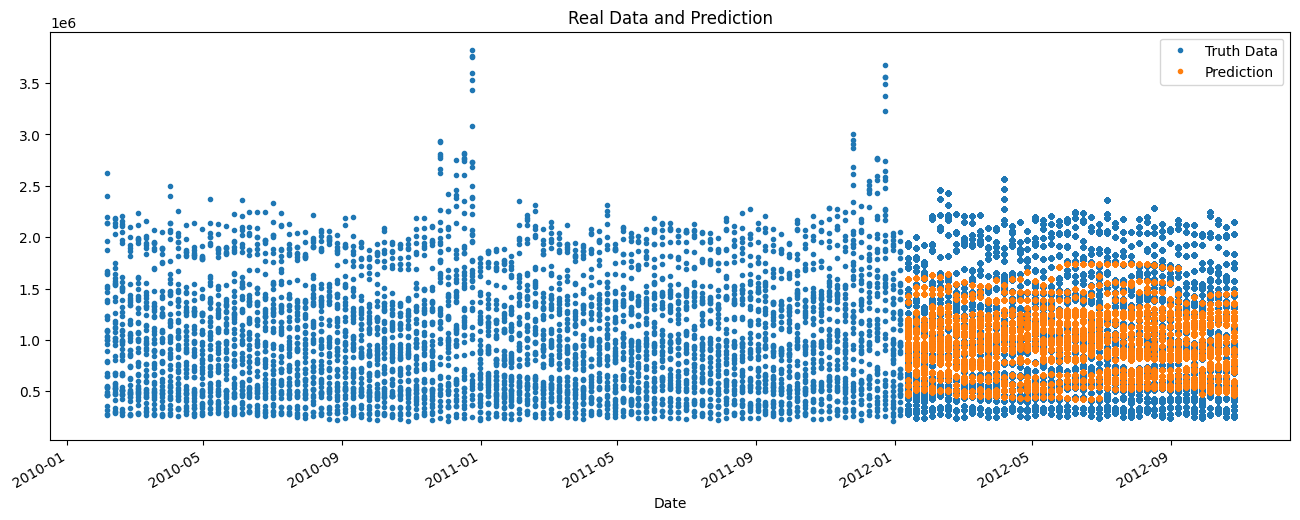

In [23]:
ax = df['Weekly_Sales'].plot(figsize=(16,6), style='.')
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Prediction'])
ax.set_title('Real Data and Prediction')
plt.show()

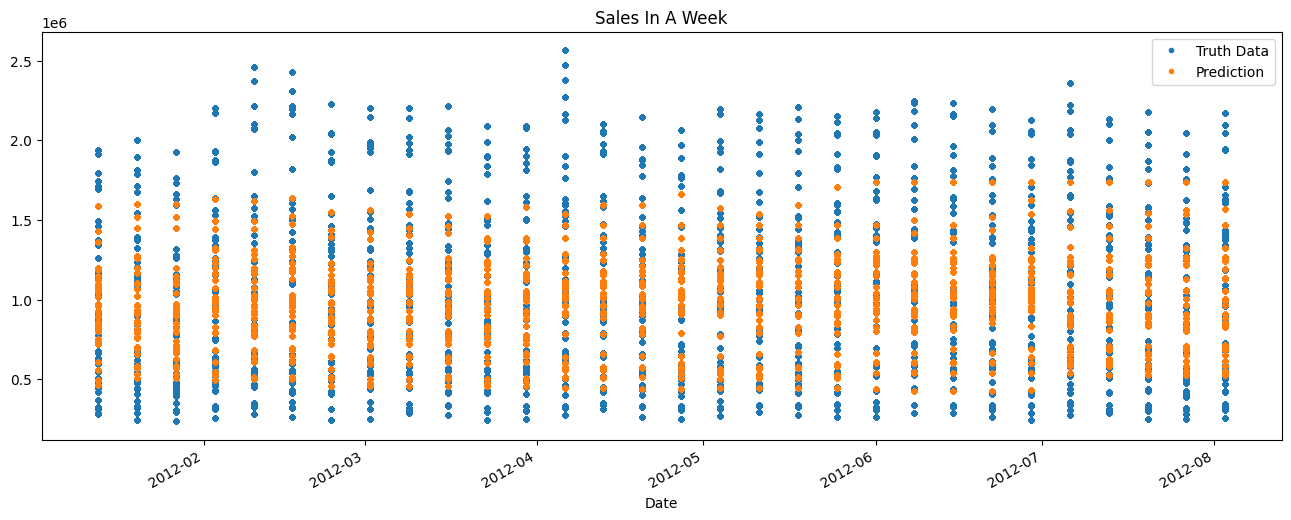

In [24]:
ax = df.loc[(df.index > '01-09-2012') & (df.index < '08-09-2012')]['Weekly_Sales'].plot(style = '.', figsize=(16, 6),
                                                                                        title='Sales In A Week')
df.loc[(df.index > '01-09-2012') & (df.index < '08-09-2012')]['prediction'].plot(style = '.', )
plt.legend(['Truth Data', 'Prediction'])
plt.show() 

In [25]:
df.to_csv('Forecasting.csv', index=False)

In [26]:
score = np.sqrt(mean_squared_error(test['Weekly_Sales'], test['prediction']))
print(f'Score Error RMSE: {score:.4f}')

Score Error RMSE: 555273.3193


In [27]:
score_log = np.sqrt(mean_squared_error(np.log(test['Weekly_Sales']), np.log(test['prediction'])))
print(f'Score Error RMSE in Log Value: {score_log:.4f}')

Score Error RMSE in Log Value: 0.6043


In [28]:
test['Error'] = np.abs(test['Weekly_Sales'] - test['prediction'])

In [29]:
test.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,hour,DayOfWeek,quarter,month,year,DayOfYear,prediction,Error
Date,,,,,,,,,,,,,,,
2012-01-13,1,1459601.17,0,48.53,3.261,219.892526,7.348,0,4,1,1,2012,13,858324.7500,601276.4200
2012-01-20,1,1394393.84,0,54.11,3.268,219.985689,7.348,0,4,1,1,2012,20,797138.1250,597255.7150
2012-01-27,1,1319325.59,0,54.26,3.290,220.078852,7.348,0,4,1,1,2012,27,968785.1875,350540.4025
2012-02-03,1,1636339.65,0,56.55,3.360,220.172015,7.348,0,4,1,2,2012,34,830404.5625,805935.0875
2012-02-10,1,1802477.43,1,48.02,3.409,220.265178,7.348,0,4,1,2,2012,41,839321.7500,963155.6800


In [30]:
test.groupby('Date')['Error'].mean().sort_values(ascending=False).head()

Date
2012-04-06    569119.926972
2012-06-08    495897.127639
2012-07-06    491596.272111
2012-02-17    490108.939611
2012-05-04    486500.679750
Name: Error, dtype: float64

In [31]:
test.groupby('Date')['Error'].mean().sort_values(ascending=True).head()

Date
2012-01-27    356686.605056
2012-01-20    372010.889278
2012-01-13    375130.974972
2012-09-14    418059.595667
2012-09-28    420624.675389
Name: Error, dtype: float64

In [32]:
print(f'Correction value between {(356686.605056/max(test['Weekly_Sales']))*100:.2f} - {(569119.926972/max(test['Weekly_Sales']))*100:.2f}')

Correction value between 13.90 - 22.19
